In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

In [81]:
df = pd.read_csv('D:/HEM_6/Machine Learning/cardio_train.csv',sep=';')

In [82]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [83]:
bool_series = df.duplicated()

In [84]:
bool_series

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

In [85]:
c=0
for i in range(len(bool_series)):
    
    if bool_series[i]==True:
        c=c+1
print(c)
        
#no duplicates

0


In [86]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
def plotbox(label):
    #plt.figure(figsize=(5,5), dpi=100)
    sns.boxplot(x=label, data=df)
    plt.title(f'{label}')

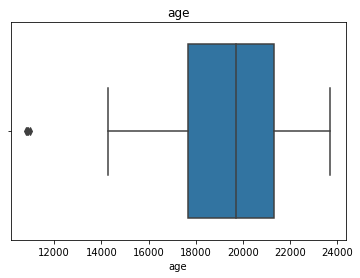

In [88]:
plotbox('age')

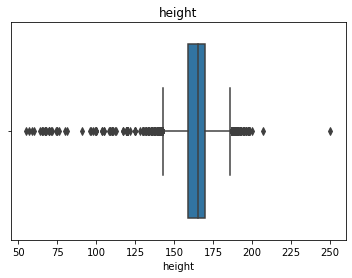

In [89]:
plotbox('height')

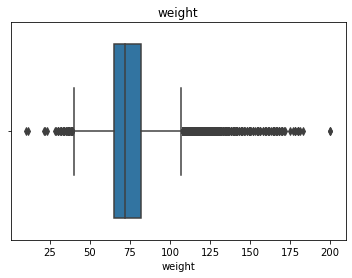

In [90]:
plotbox('weight')

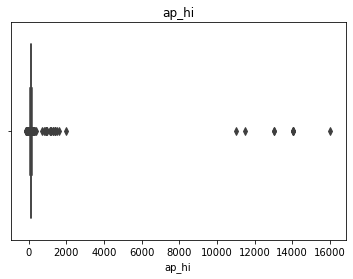

In [91]:
plotbox('ap_hi')

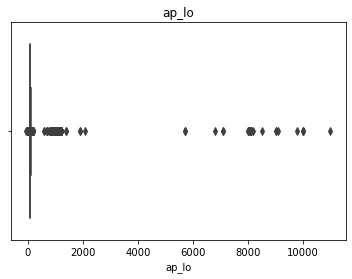

In [92]:
plotbox('ap_lo') #There are alot of outliers

In [93]:
numeric_col = ['age','weight','height','ap_lo', 'ap_hi']

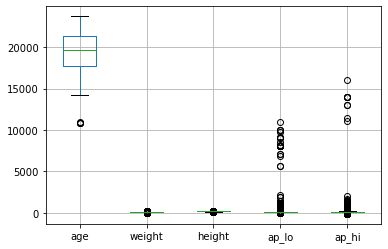

In [94]:
df.boxplot(numeric_col)

In [95]:
def remove_outliers(label):
    q75,q25 = np.percentile(df[label],[75,25])
    intr_qr = q75-q25
    
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[label] < min,label] = np.nan
    df.loc[df[label] > max,label] = np.nan
    df.isnull().sum()
    
    

In [96]:

remove_outliers('age')
df = df.dropna(axis = 0)
remove_outliers('weight')
df = df.dropna(axis = 0)
remove_outliers('height')
df = df.dropna(axis = 0)
remove_outliers('ap_lo')
df = df.dropna(axis = 0)
remove_outliers('ap_hi')
df = df.dropna(axis = 0)

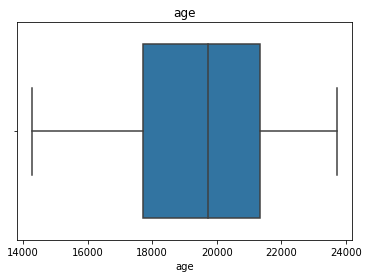

In [97]:
plotbox('age') 





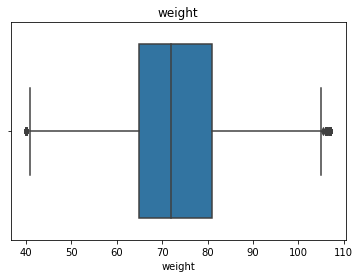

In [98]:
plotbox('weight')

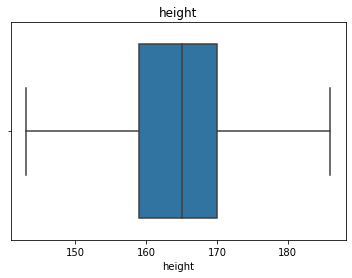

In [99]:
plotbox('height')

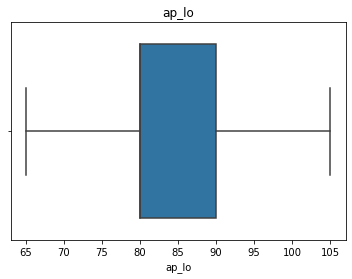

In [100]:
plotbox('ap_lo')

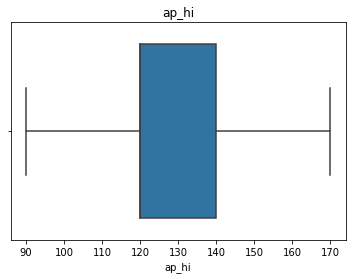

In [101]:
plotbox('ap_hi')

In [102]:
def discrete(label):
    map=[]
    q25,q50,q75 = np.percentile(df[label],[25, 50,75])
    data_min, data_max = df[label].min(), df[label].max()
    for row in df[label]:
        if row >= data_min and row  < q25:   map.append(1)#Normal
        elif row >= q25 and row < q50:  map.append(2)#Normal
        elif row >= q50 and row < q75:  map.append(3)#Normal
        elif row >= q75 and row <= data_max:  map.append(4)#Normal
    return map
    
        

In [103]:
df['new_ap_lo']=discrete('ap_lo')

In [104]:
df['new_weight']=discrete('weight')


In [105]:
df['new_height']=discrete('height')

In [106]:
df['new_age']=discrete('age')

In [107]:
df['new_ap_hi']=discrete('ap_hi')

In [108]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_ap_lo,new_weight,new_height,new_age,new_ap_hi
0,0,18393.0,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0,3,1,3,2,1
1,1,20228.0,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1,4,4,1,3,4
2,2,18857.0,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1,1,1,3,2,3
3,3,17623.0,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1,4,4,3,1,4
5,8,21914.0,1,151.0,67.0,120.0,80.0,2,2,0,0,0,0,3,2,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699.0,1,172.0,70.0,130.0,90.0,1,1,0,0,1,1,4,2,4,2,3
69994,99992,21074.0,1,165.0,80.0,150.0,80.0,1,1,0,0,1,1,3,3,3,3,4
69995,99993,19240.0,2,168.0,76.0,120.0,80.0,1,1,1,0,1,0,3,3,3,2,3
69998,99998,22431.0,1,163.0,72.0,135.0,80.0,1,2,0,0,0,1,3,3,2,4,3


In [109]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
new_ap_lo      0
new_weight     0
new_height     0
new_age        0
new_ap_hi      0
dtype: int64

In [110]:
df = df.drop('id', axis=1)
df = df.drop('age', axis=1)
df = df.drop('height', axis=1)
df = df.drop('weight', axis=1)
df = df.drop('ap_hi', axis=1)
df = df.drop('ap_lo', axis=1)

In [111]:
# def label_encoder(dataframe, binary_col):
#     labelencoder = LabelEncoder()
#     dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col].astype(str))
#     return dataframe

# binary_cols = [col for col in df.columns if df[col].dtypes == "O"
#                and len(df[col].unique()) == 2]

# for col in df.columns:
#     label_encoder(df, col)
    
# def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
#     dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
#     return dataframe

# ohe_cols = [col for col in df.columns if 10 >= len(df[col].unique()) > 2]

# df=one_hot_encoder(df, ohe_cols, drop_first=True)
# df.head()

In [112]:

      
    
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [113]:
class tree():
    def __init__(self, min_samples_split=2, max_depth=2):
        
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
            
            
    def build_tree(self, dataset, curr_depth=0):
         
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"]>0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = -float("inf")
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        
        
        gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

        
    def calculate_leaf_value(self, Y):
        
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)


In [114]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [115]:
import time
classifier = tree(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()
time_sec1 = time.time()

# Print the time 
print("Time in seconds for learning:", time_sec1)

X_7 <= 3 ? 0.29309228994285896
 left:X_7 <= 1 ? 0.23297525206679726
  left:X_6 <= 0 ? 0.046873594577212074
    left:X_8 <= 1 ? 0.01571975204005094
        left:1
        right:1
    right:X_8 <= 1 ? 0.010599243032903383
        left:1
        right:1
  right:X_6 <= 0 ? 0.0605143027382935
    left:X_1 <= 1 ? 0.007482703260352053
        left:3
        right:3
    right:X_1 <= 1 ? 0.00563015758699581
        left:3
        right:3
 right:X_6 <= 0 ? 0.05790303894387172
  left:X_1 <= 2 ? 0.024270084036103867
    left:X_10 <= 2 ? 0.01415523044985667
        left:3
        right:4
    right:X_9 <= 1 ? 0.0067603796053682386
        left:4
        right:4
  right:X_1 <= 2 ? 0.001632555396477331
    left:X_1 <= 1 ? 0.0020758792412667315
        left:4
        right:4
    right:X_10 <= 2 ? 0.0069187756025596014
        left:4
        right:4
Time in seconds for learning: 1649379218.7850633


In [116]:
Y_pred = classifier.predict(X_test) 
Ypred = classifier.predict(X_train) 
time_sec2 = time.time()-time_sec1
  
# Print the time 
print("Time in seconds for predecting:", time_sec2)
from sklearn.metrics import accuracy_score
 #accuracy of the implemented of prediction

print( 'Testing accuracy using scratch = ' + str(accuracy_score(Y_test, Y_pred)))
print( 'Training accuracy using scratch = ' + str(accuracy_score(Y_train,Ypred)))

Time in seconds for predecting: 2.5429248809814453
Testing accuracy using scratch = 0.7668186545076394
Training accuracy using scratch = 0.7671646567068658


In [117]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2018)

decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=8,splitter='best',random_state=2018)
decision_tree.fit(X_train, y_train)
acc_decision_tree_train = decision_tree.score(X_train, y_train) 
acc_decision_tree_test = decision_tree.score( X_test, y_test) 
print( 'Testing accuracy using sklearn = ' + str(acc_decision_tree_test))
print( 'Training accuracy using sklearn = ' + str(acc_decision_tree_train))
#accuracy_score(Y_test, X_test)


Testing accuracy using sklearn = 0.7641725774625353
Training accuracy using sklearn = 0.7732394688121415


In [ ]:
#accuracy changes after applying the one_hot_encoder is extremely high to see it, plerse uncomment the one hot encoding part.Although it takes much time.

#the algorithm of sklearn is more accurate by a slight difference, but it takes less time than the time of the scratch algorithm.